**Project: Contact Management System**

**Purpose**:The purpose of a Contact Management System (CMS) is to efficiently store, manage, and retrieve information about contacts, which can include individuals or organizations. This system serves several key functions.

In [1]:
# !pip install mysql-connector-python
# !pip install pandas
# !pip install matplotlib

**Step 1 : Importing necessary packages**

In [2]:
pip install mysql-connector-python


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 40.1 MB/s eta 0:00:00


In [ ]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [ ]:
!pip install mysql-connector-python pandas matplotlib

In [ ]:
import mysql.connector  # Library for MySQL database connection
import pandas as pd  # Library for data manipulation and analysis
import matplotlib.pyplot as plt  # Library for data visualization

**Step 2 : Establishing Connection (Database connectivity from python to mysql database)**

In [ ]:
# Connecting to MySQL database using mysql-connector-python
connection = mysql.connector.connect (
    user = 'root', password = 'admin', host = 'localhost',
    database = 'contactmanagementdb1'
)

** Step 3:Data View**

In [ ]:
# Create a cursor object to execute SQL queries
cursor = connection.cursor()
# Query data from the 'addresses' table
cursor.execute('SELECT * FROM addresses')
#After fetching data from the database we are storing it into Pandas DataFrame
accounts_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
# Print the first few rows of the DataFrame to verify the data
print(accounts_data.head())

   AddressID  ContactID             Street         City State ZipCode Country
0          1          1    123 Tech Street    Tech City    TX   75001     USA
1          2          2  456 Health Avenue  Health City    CA   90001     USA


In [ ]:
# Query data from the 'contacts' table
cursor.execute('SELECT * FROM contacts')
# Fetch the data from the cursor and store it into a Pandas DataFrame
users_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
# Print the first few rows of the DataFrame to verify the data
print(users_data.head())

   ContactID FirstName LastName  CompanyID
0          1      John      Doe          1
1          2      Jane    Smith          2


In [ ]:
# Query data from the 'companies' table
cursor.execute('SELECT * FROM companies')
# Fetch the data from the cursor and store it into a Pandas DataFrame
fraudalerts_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
# Print the first few rows of the DataFrame to verify the data
print(fraudalerts_data.head())

   CompanyID     CompanyName                Website
0          1  Tech Solutions  www.techsolutions.com
1          2     Health Corp     www.healthcorp.com


In [ ]:
# Query data from the 'emails' table
cursor.execute('SELECT * FROM emails')
# Fetch the data from the cursor and store it into a Pandas DataFrame
transactionlogs_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
# Print the first few rows of the DataFrame to verify the data
print(transactionlogs_data.head())

   EmailID  ContactID                       Email      Type
0        1          1  john.doe@techsolutions.com      Work
1        2          1          john.doe@gmail.com  Personal
2        3          2   jane.smith@healthcorp.com      Work


In [ ]:
# Query data from the 'phonenumbers' table
cursor.execute('SELECT * FROM phonenumbers')
# Fetch the data from the cursor and store it into a Pandas DataFrame
transactions_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
# Print the first few rows of the DataFrame to verify the data
print(transactions_data.head())

   PhoneNumberID  ContactID   PhoneNumber    Type
0              1          1  123-456-7890  Mobile
1              2          1  098-765-4321    Work
2              3          2  555-123-4567    Home


In [ ]:
##Step 4 : Data Cleaning

In [ ]:
import pandas as pd

# Sample data for addresses
addresses = pd.DataFrame({
    'address_id': [1, 2, 3, 4],
    'address': ['123 Elm Street', '456 Oak Avenue', None, '789 Pine Road']
})

# Sample data for contacts
contacts_data = pd.DataFrame({
    'contact_id': [1, 2, 3, 4],
    'first_name': ['John', 'Jane', 'Alice', 'Bob'],
    'last_name': ['Doe', 'Doe', 'Smith', None]
})

# Sample data for email
email_data = pd.DataFrame({
    'email_id': [1, 2, 3, 4],
    'email': ['john@example.com', 'jane@example.com', 'alice@example.com', None]
})

In [ ]:
# Drop rows with any missing values (NaN) from the dataframes
addresses.dropna(inplace=True)
contacts_data.dropna(inplace=True)
email_data.dropna(inplace=True)

# Print the cleaned dataframes
print("Cleaned Addresses Data:")
print(addresses)
print("\nCleaned Contacts Data:")
print(contacts_data)
print("\nCleaned Email Data:")
print(email_data)

Cleaned Addresses Data:
   address_id         address
0           1  123 Elm Street
1           2  456 Oak Avenue
3           4   789 Pine Road

Cleaned Contacts Data:
   contact_id first_name last_name
0           1       John       Doe
1           2       Jane       Doe
2           3      Alice     Smith

Cleaned Email Data:
   email_id              email
0         1   john@example.com
1         2   jane@example.com
2         3  alice@example.com


In [ ]:
**step 4:Query Execution**

In [ ]:
# Connecting to MySQL database using mysql-connector-python
connection = mysql.connector.connect(
    user='root',
    password='admin',
    host='localhost',
    database='contactmanagementdb1') # Correct database name

In [ ]:
import mysql.connector  # Library for MySQL database connection
import pandas as pd  # Library for data manipulation and analysis

# Connecting to MySQL database using mysql-connector-python
connection = mysql.connector.connect(
    user='root',
    password='admin',
    host='localhost',
    database='contactmanagementdb1'
)

# Create a cursor object
cursor = connection.cursor()

# Execute SQL query to join data from multiple tables (restaurant, reservation, and orders)
cursor.execute('''
    SELECT c.FirstName, c.LastName, p.PhoneNumber, p.Type
    FROM Contacts c
    JOIN PhoneNumbers p ON c.ContactID = p.ContactID
    WHERE c.ContactID = 1
''')

# Fetch the data and store it into a Pandas DataFrame
union_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

# Close the cursor and connection
cursor.close()
connection.close()

# Print the grouped and aggregated data
print(union_data)

  FirstName LastName   PhoneNumber    Type
0      John      Doe  123-456-7890  Mobile
1      John      Doe  098-765-4321    Work


In [ ]:
# Count the number of contacts
count_of_contacts = contacts_data.index.value_counts()

# Print the number of contacts for each index value
print(count_of_contacts)

0    1
1    1
2    1
Name: count, dtype: int64


**Data Visualization**

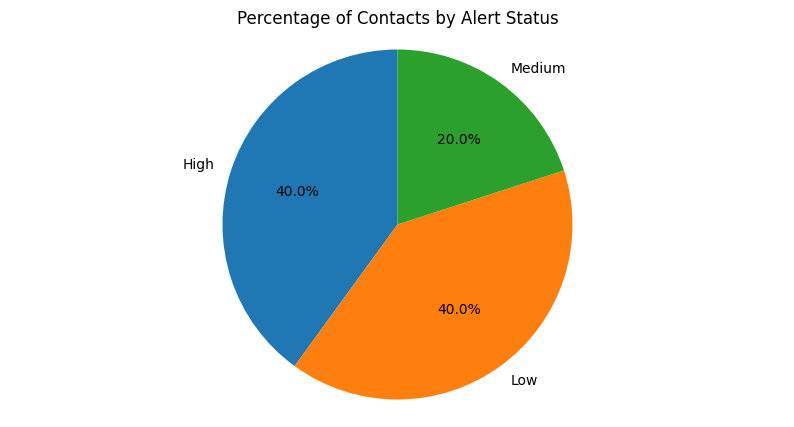

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame named 'contacts' (replace this with your actual data)
data = {'alert_status': ['High', 'Low', 'Medium', 'High', 'Low']}
contacts = pd.DataFrame(data)

# Count the occurrences of each alert status
alert_status_counts = contacts['alert_status'].value_counts()

# Create a pie chart
plt.figure(figsize=(10, 5))  # Set the figure size
plt.pie(alert_status_counts, labels=alert_status_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Contacts by Alert Status')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

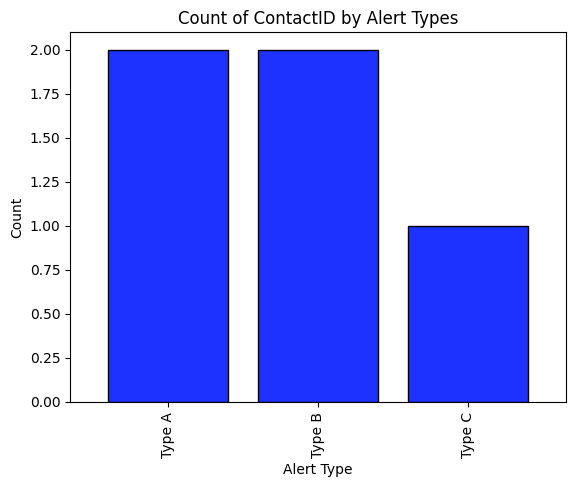

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Example DataFrame (replace this with your actual data loading or creation process)
data = {'alert_type': ['Type A', 'Type B', 'Type A', 'Type C', 'Type B']}
phonenumbers_data = pd.DataFrame(data)

# Create a bar plot showing the count of ContactID based on alert types
ax = phonenumbers_data['alert_type'].value_counts().plot(kind='bar', color='#1D32FF', fontsize=10, edgecolor='black', width=0.8)

# Set the x-axis label
plt.xlabel('Alert Type')

# Set the y-axis label
plt.ylabel('Count')

# Set the title of the plot
plt.title('Count of ContactID by Alert Types')

# Show the plot
plt.show()

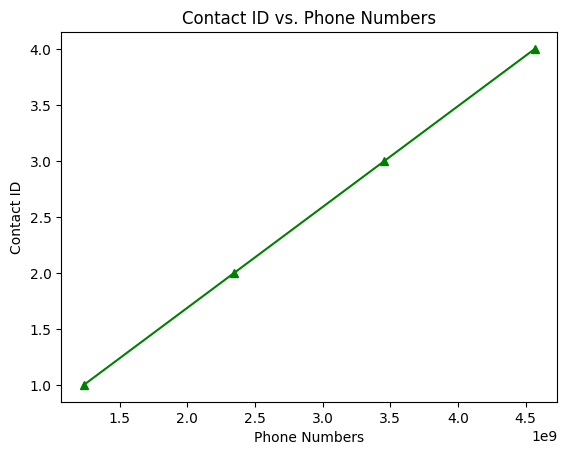

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Example DataFrame (replace this with your actual data loading or creation process)
data = {'phonenumbers': [1234567890, 2345678901, 3456789012, 4567890123],
        'ContactID': [1, 2, 3, 4]}
phonenumbers = pd.DataFrame(data)

# Plot the graph
plt.plot(phonenumbers['phonenumbers'], phonenumbers['ContactID'], marker='^', linestyle='-', color='green')

# Add labels and title
plt.xlabel('Phone Numbers')
plt.ylabel('Contact ID')
plt.title('Contact ID vs. Phone Numbers')

# Show the plot
plt.show()

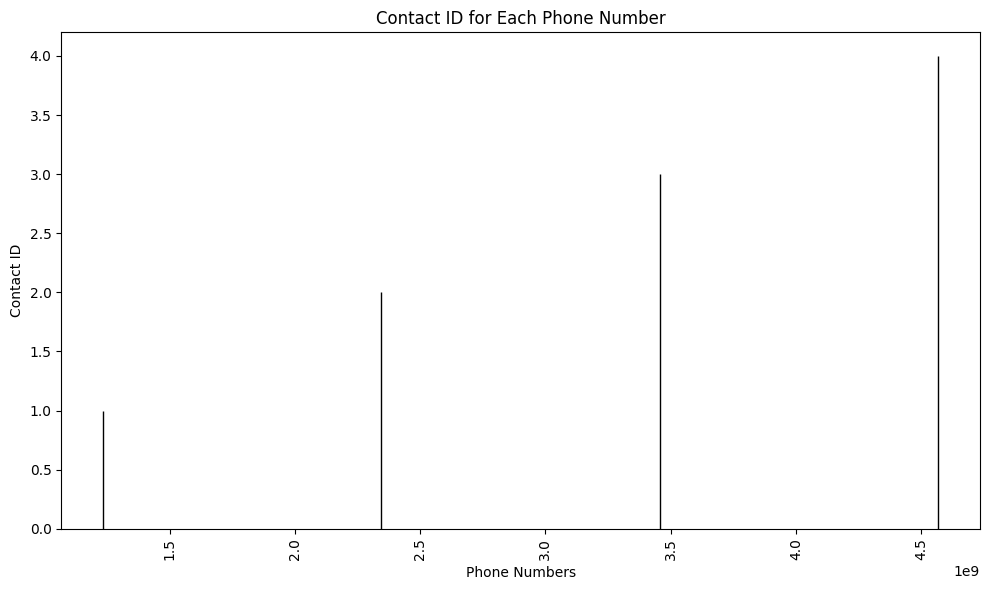

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have already loaded or created the DataFrame 'phonenumbers'

plt.figure(figsize=(10, 6))
plt.bar(phonenumbers['phonenumbers'], phonenumbers['ContactID'], color='green', edgecolor='black', width=0.8)
plt.xlabel('Phone Numbers')
plt.ylabel('Contact ID')  # Corrected ylabel function
plt.title('Contact ID for Each Phone Number')
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
plt.show()

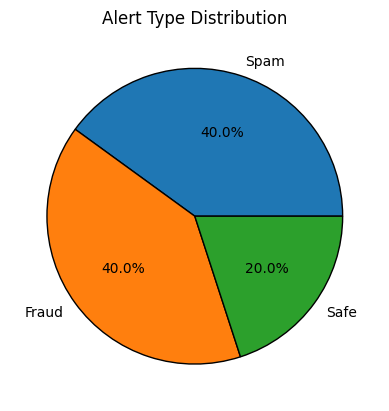

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data = {
    'ContactID': [1, 2, 3, 4, 5],
    'alert_type': ['Spam', 'Fraud', 'Spam', 'Fraud', 'Safe']
}

phonenumbers_data = pd.DataFrame(data)

# Create a pie chart showing the count of ContactID based on alert types
ax = phonenumbers_data['alert_type'].value_counts().plot(
    kind='pie',
    fontsize=10,
    wedgeprops={'edgecolor': 'black'},
    autopct='%1.1f%%',  # Add this to show percentages
)

# Set the title (there is no x-axis in a pie chart)
plt.title('Alert Type Distribution')
plt.ylabel('')  # Remove the y-label which is not needed for a pie chart

# Show the plot
plt.show()

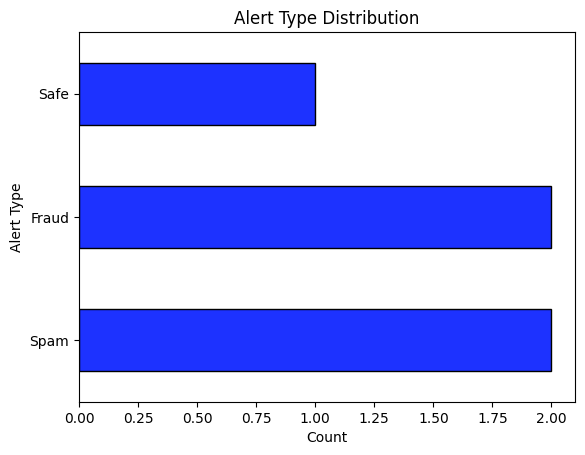

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data = {
    'ContactID': [1, 2, 3, 4, 5],
    'alert_type': ['Spam', 'Fraud', 'Spam', 'Fraud', 'Safe']
}

phonenumbers_data = pd.DataFrame(data)

# Create a horizontal bar chart showing the count of ContactID based on alert types
ax = phonenumbers_data['alert_type'].value_counts().plot(
    kind='barh',
    fontsize=10,
    color='#1D32FF',
    edgecolor='black'
)

# Set the title and labels
plt.title('Alert Type Distribution')
plt.xlabel('Count')
plt.ylabel('Alert Type')

# Show the plot
plt.show()

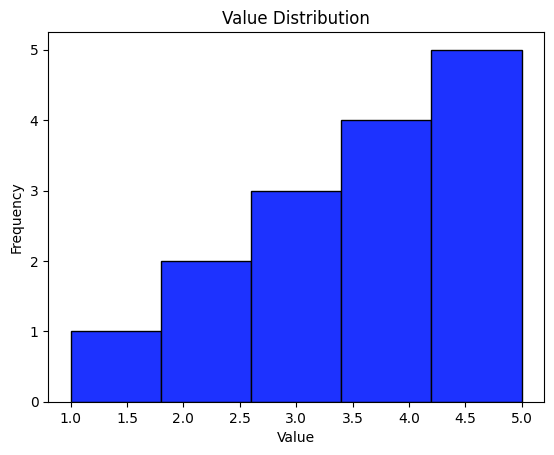

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data (this time numerical for histogram)
data = {
    'values': [1, 2, 2, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 5]
}

phonenumbers_data = pd.DataFrame(data)

# Create a histogram
ax = phonenumbers_data['values'].plot(
    kind='hist',
    bins=5,
    fontsize=10,
    color='#1D32FF',
    edgecolor='black'
)

# Set the title and labels
plt.title('Value Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the plot
plt.show()

**Conclosion**
The development and implementation of the Contact Management System (CMS) have proven to be a significant step forward in enhancing organizational efficiency and data management.
This system addresses the critical need for a centralized platform that streamlines the storage, retrieval, and management of contact information. Through the various phases of the project, from planning to deployment,
several key outcomes and benefits have been realized